In [24]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [25]:
#Define State
class BMIstate(TypedDict):
  weight_kg:float
  height_m:float
  bmi :float
  category:str

In [26]:
def calculatebmi(state:BMIstate)->BMIstate:
  state['bmi']=round(state['weight_kg']/(state['height_m']**2),2)
  return state


In [27]:
def category(state:BMIstate)->BMIstate:
  if(state['bmi']<18.5):
    state['category']='Underweight'
  elif(state['bmi']<25):
    state['category']='Normal'
  elif(state['bmi']<30):
    state['category']='Overweight'
  else:
    state['category']='Obese'
  return state

In [28]:
# Define graph
graph=StateGraph(BMIstate)

#Add Node
graph.add_node('Calculate',calculatebmi)
graph.add_node('category',category)
#Add Edge
graph.add_edge(START,'Calculate')
graph.add_edge('Calculate','category')
graph.add_edge('category',END)
#compile
workflow =graph.compile()



In [29]:
# Execute
input_state=({'weight_kg':80 ,'height_m':1.73})
output_state=workflow.invoke(input_state)
print(output_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


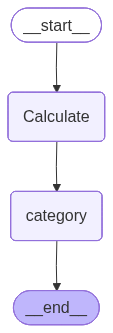

In [30]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())